In [2]:
from glob import glob
import os 
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'
sns.set_style('white', {'axes.grid' : False})

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

root_path = "/storage/liuyi/00.SNP_project/code/gigascience_update"

In [5]:
sample = 'dcis1'
adata = sc.read_h5ad(f'{root_path}/otherdata_for_figure/Figure3/{sample}.subclone.h5ad')

In [6]:
adata.uns['log1p']['base'] = None

In [7]:
sc.tl.rank_genes_groups(adata, "RNA_cluster", method="wilcoxon")

In [8]:
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
lfc = pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals","logfoldchanges"]
    }
)

In [9]:
sc.pp.scale(adata)

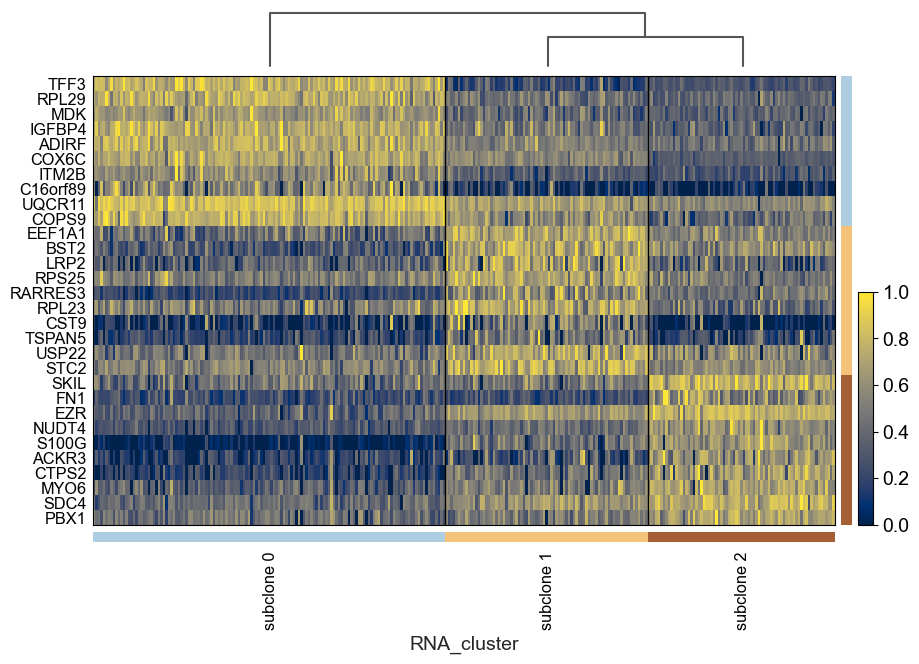

In [10]:
sc.pl.rank_genes_groups_heatmap(
    adata,n_genes=10,use_raw=True,standard_scale = 'var',swap_axes=True,cmap="cividis",figsize=(10, 7),#save = 'dcis1clone.hm.pdf'
)

# SNV cluster

In [35]:
sample = 'dcis1'
rna = sc.read_h5ad(f'{root_path}/rna_adata/{sample}.rna.h5ad')
snv = sc.read_h5ad(f'{root_path}/otherdata_for_figure/SupFigure/subsnv.dcis1.h5ad')
snv.obs['cluster'] = rna.obs['cluster']
snv = snv[snv.obs['cluster']=='Tumor']

In [36]:
sc.pp.neighbors(snv, n_neighbors=15, n_pcs=10)

In [37]:
sc.tl.leiden(snv,resolution=0.15,)

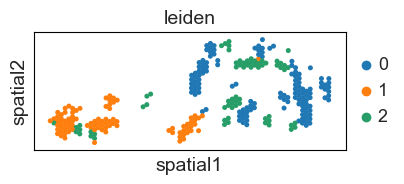

In [38]:
sc.pl.spatial(snv,color = 'leiden', spot_size = 70, basis = 'spatial')

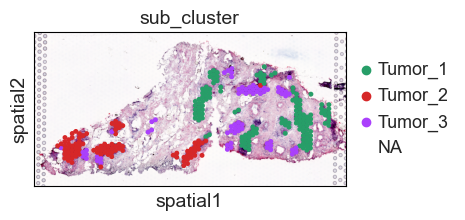

In [39]:
sc.pl.spatial(rna,groups = ['Tumor_1','Tumor_2','Tumor_3'],color = 'sub_cluster', spot_size = 70, basis = 'spatial')

In [40]:
snv.obs['sub_cluster'] = rna.obs['sub_cluster']
snv.obs['rename_leiden'] = snv.obs['leiden'].map({'0':'Tumor_1','1':'Tumor_2','2':'Tumor_3'})
subrna = rna[rna.obs['sub_cluster'].isin(['Tumor_1','Tumor_2','Tumor_3'])]
snv.uns['rename_leiden_colors'] = subrna.uns['sub_cluster_colors']
snv.uns['spatial'] = subrna.uns['spatial']

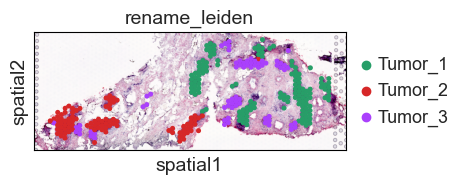

In [41]:
sc.pl.spatial(snv,groups = ['Tumor_1','Tumor_2','Tumor_3'],color = 'rename_leiden', spot_size = 70, basis = 'spatial')

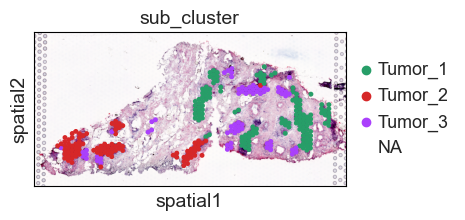

In [42]:
sc.pl.spatial(rna,groups = ['Tumor_1','Tumor_2','Tumor_3'],color = 'sub_cluster', spot_size = 70, basis = 'spatial')

In [43]:
snvdf = snv.obs[['rename_leiden','sub_cluster']].copy()

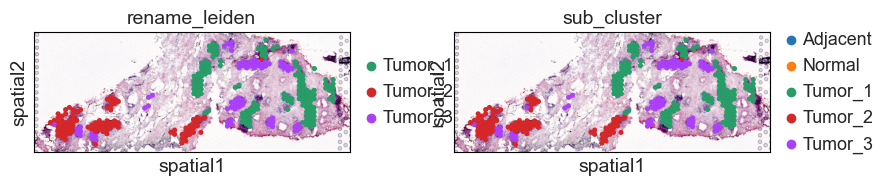

In [44]:
sc.pl.spatial(snv,color = ['rename_leiden','sub_cluster'], spot_size = 70, basis = 'spatial')

In [45]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(snvdf['sub_cluster'], snvdf['rename_leiden'])
print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.9919509966514609
